In [21]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from analysis_functions import *

In [23]:
tems, pres, df_fit = import_data('Time_Series_Abril')

In [30]:
plot_profile_fit(df_fit, tems, pres, 2000) # representación del ajuste y perfil número 2000 de la serie

<IPython.core.display.Javascript object>

D1: 35.03, a1: 15.57, b3: -3.05E-03, b2:4.05E-02, c2: 1.60E-03


## Parámetros del ajuste para toda la serie temporal
Ajuste a función:
$$f(z) = a_3 + b_3(z − D) + a_2 e^{(− b_2(z − D) − c_2(z − D)^2)}$$

si $z > D$. En caso contrario: $f(z) = D$

Parámetros:
- `D1`: Profundidad de la capa de mezcla (m)
- `a1`: SST (ºC)
- `a2`: Salto entre termoclina estacional y permanente (ºC)
- `b3`: Pendiente de la termoclina permanente (ºC/m)
- `a3`: Temperatura base de la termoclina permanente (ºC)

Se representan la evolución de los parámetros de ajuste para toda la serie temporal en intervalos de 800 medidas (? minutos):

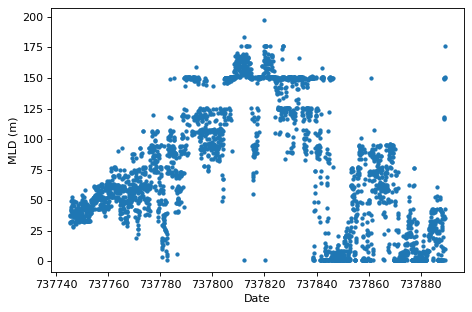

In [31]:
plot_fit_variable(df_fit, 'D1m', 800)

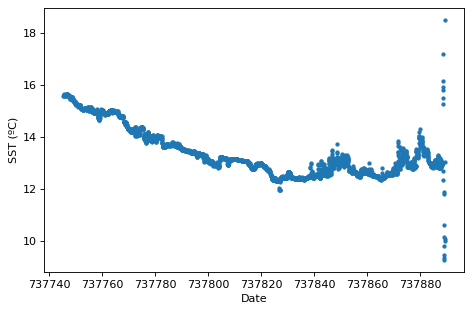

In [32]:
plot_fit_variable(df_fit, 'a1m', 800)

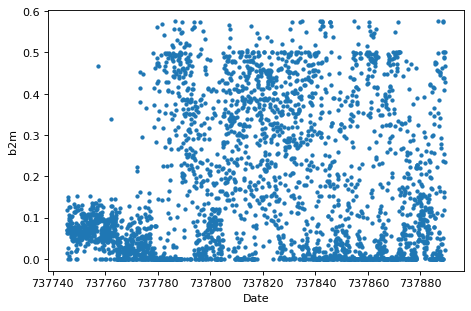

In [33]:
plot_fit_variable(df_fit, 'b2m', 800)

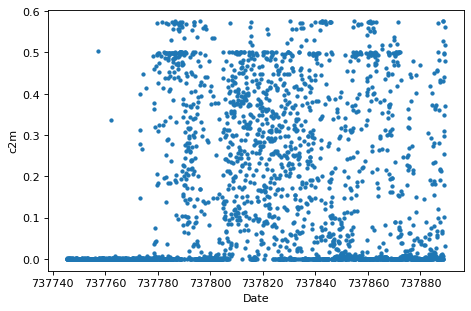

In [34]:
plot_fit_variable(df_fit, 'c2m', 800)

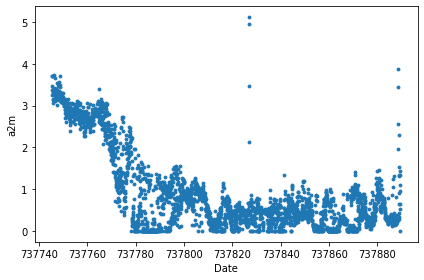

In [9]:
plot_fit_variable(df_fit, 'a2m', 800)

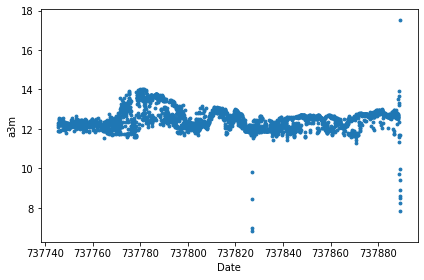

In [10]:
plot_fit_variable(df_fit, 'a3m', 800)

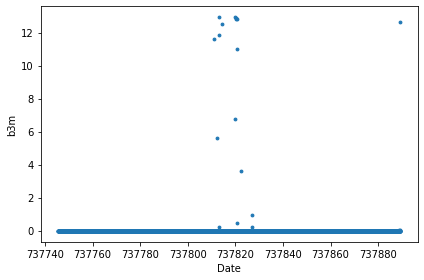

In [12]:
plot_fit_variable(df_fit, 'b3m', 800)

### Problema con los últimos datos. ####
Las temperaturas de los termistores no siguen ninguna tendencia clara, con discrepancias de más de 5 grados en solo unos pocos metros de profundidad para lás ultimas fechas de la serie. El Compartamiento anomalo comienza bruscamente a partir del perfil con fecha 737888.413299, perfil número 2470265. ¿Error al generar la serie de datos a partir de los archivos .mat de cada termistor? 

Sin conocer la extension temporal de la serie de datos, pero sabiendo que los últimos valores están cercanos al mes de abril, cuando la estratificación 

## Análisis espectral

19.16251359281925 6.865085627668883e-16 0.002154614046535 -0.004488299724952 0.3666476514139465 12.986010549644137


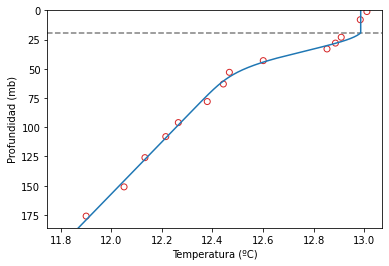

In [15]:
plot_profile_fit(df_fit, tems, pres, 2470000) # 

17.593658181885843 0.072278647461986 4.1841830925853676e-14 -0.0036549079856136 0.3187117984287234 13.065450000149797


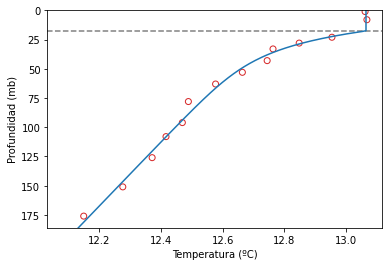

In [6]:
plot_profile_fit(df_fit, tems, pres, 2380000) 

34.646341769794816 1.1503182648210689e-07 0.0040401461998049 -0.0026150538614255 0.1712930336837357 12.7976216661182
17.593658181885843 0.072278647461986 4.1841830925853676e-14 -0.0036549079856136 0.3187117984287234 13.065450000149797
1.0000089165801214 0.4996389291959894 0.4999899028941482 -0.0049031504498931 0.3169796279698093 13.26519999830193
149.5722492950576 0.1177547920018744 0.1800427182693687 -0.000364025785934 0.9086533565124288 10.623774391958674


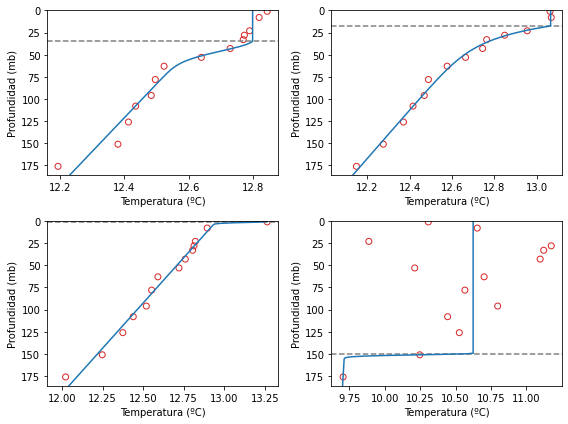

In [13]:
plot_multiple_profiles(df_fit, tems, pres, [2280000, 2380000, 2440000, 2480000])

34.646341769794816 1.1503182648210689e-07 0.0040401461998049 -0.0026150538614255 0.1712930336837357 12.7976216661182


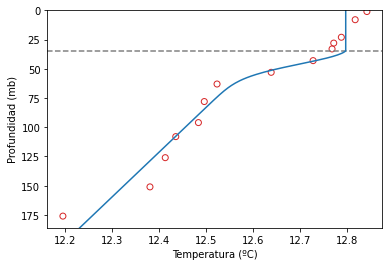

In [7]:
plot_profile_fit(df_fit, tems, pres, 2280000) 

In [27]:
animate_profile_evolution(df_fit, tems, pres, 2440000, 2450000, 1000)

<IPython.core.display.Javascript object>

In [28]:
spectral_analysis(df_fit, 'D1m')

<IPython.core.display.Javascript object>

## Estratificación y forma de los ajustes
Se computan los valores $G_\alpha$ y $R_{\alpha:\beta}$ para toda la serie temporal:

$$\Delta_\alpha = \frac{-b_2}{2c_2}\left(1-\sqrt{1-2\lambda log(\alpha)}\right)$$


$$G_\alpha = \frac{f(D) - f(D_\alpha)}{\Delta_\alpha}$$

## Problemas encontrados
1. No todos los ficheros de datos tienen el mismo número de datos -> Serie temporal capada hasta tiempo en que todos los transisitores han realizado medidas
2. Últimos datos de la serie inconsistentes? No se observa un perfil definido, ajuste físico imposible. Relacionado con 1?
3. Fechas: como pasar valores numéricos a seg/min/h/día/mes/año?

## Ideas y futuros pasos
- Aplicar FFT a los parámetros relevantes e indices de estratificación y forma para estudiar periodicidad
- Modificar evolución diferencial para tener en cuenta variaciones en la presión utilizando termistores SBE37